# Analysis and Figures for AGU

In [1]:
# Read in the data.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

working_directory = "../../temp_data/"

In [2]:
def p_X_gt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data>=x)/n_data for x in X ])

def p_X_lt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data<=x)/n_data for x in X ])

In [45]:
data_file = '20181207_GRUMP2015_zone_pop.csv'
datafile = working_directory + data_file
df = pd.read_csv(datafile)

In [46]:
print(df.shape)
print(df.columns)

(363, 9)
Index(['Unnamed: 0', 'osm_id', 'FID', 'country', 'city', 'lat', 'lon',
       'geometry', 'GRUMP2015_PopTot'],
      dtype='object')


In [47]:
variable = 'GRUMP2015_PopTot'
year = 2000

In [48]:
# drop doubles and zeros
print(df.shape)
df = df[df[variable] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)
print(df.shape)
df = df.drop_duplicates('osm_id', keep=False)
print(df.shape)

(363, 9)
(302, 9)
(268, 9)


In [31]:
### List of African Countries from the UN in OSM wiki

Northern_Africa = (['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara'], 'Northern_Africa')

Eastern_Africa = ([
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    #Mayotte,
    'Mozambique',
    'Réunion',
    'Rwanda',
    'Somalia',
    'Sudan',
    'Uganda',
    'Tanzania',
    'Zambia',
    'Zimbabwe'], 'Eastern_Africa')
    
Middle_Africa = ([
    'Angola',
    'Cameroon',
    'Central African Republic',
    'Chad',
    'Congo-Brazzaville',
    'Congo-Kinshasa',
    'Equatorial Guinea',
    'Gabon',
    'Sao Tome and Principe'], 'Middle_Africa')
    
Southern_Africa = ([
    'Botswana',
    'Lesotho',
    'Namibia',
    'South Africa',
    'Swaziland'], 'Southern_Africa')
    
Western_Africa = ([
    'Benin',
    'Burkina Faso',
    'Cape Verde',
    'Côte d\'Ivoire',
    'Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Senegal',
    'Sierra Leone',
    'Togo'], 'Western_Africa')

In [41]:
regions = [Northern_Africa, Western_Africa, Eastern_Africa, Southern_Africa, Middle_Africa]

In [49]:
arr =[]
for region in regions:
    for country in region[0]:
        for i, row in df.iterrows():
            if row['country'] == country:
                #row['region'] = region[1] 
                #df_copy.iloc[i] = row
                #region[1]
                arr.append(region[1])

In [50]:
df['region'] = arr

In [51]:
GRUMP2015_df = df.copy()
GRUMP2015_df.head()

,Unnamed: 0,osm_id,FID,country,city,lat,lon,geometry,GRUMP2015_PopTot,region
0,0,27564946,301,Algeria,Constantine,36.364519,6.608260,"POLYGON ((6.508333 36.475, 6.525 36.475, 6.525...",8.080542e+05,Northern_Africa
1,1,27565103,582,Algeria,Oran,35.703275,-0.649298,"POLYGON ((-0.808333 35.775, -0.791667 35.775, ...",1.359337e+06,Northern_Africa
2,2,262963217,1419,Algeria,El Oued,33.361177,6.860349,"POLYGON ((6.883333 33.433333, 6.9 33.433333, 6...",1.580997e+05,Northern_Africa
3,3,288387133,83,Algeria,Kouba,36.733768,3.086179,"POLYGON ((3.008333 36.825, 3.016667 36.825, 3....",5.040620e+06,Northern_Africa
4,4,288417925,338,Algeria,Médéa,36.265344,2.766957,"POLYGON ((2.75 36.341667, 2.758333 36.341667, ...",1.494868e+05,Northern_Africa


In [ ]:
print(WP2015_df.shape)
print(WP2000_df.shape)

In [127]:
WP2000 = WP2000_df['WP2000_PopTot'].sort_values()
X0, y0 = p_X_gt_x(WP2000)

WP2015 = WP2015_df['WP2015_PopTot'].sort_values()
X1, y1 = p_X_gt_x(WP2015)

In [128]:
GRUMP2000 = GRUMP2000_df['GRUMP2000_PopTot'].sort_values()
X2, y2 = p_X_gt_x(GRUMP2000)

GRUMP2015 = GRUMP2015_df['GRUMP2015_PopTot'].sort_values()
X3, y3 = p_X_gt_x(GRUMP2015)

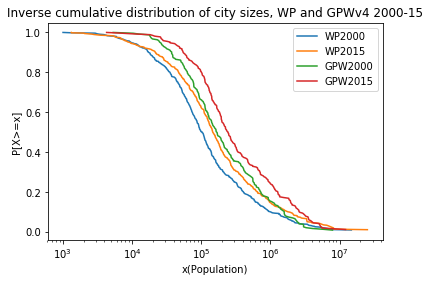

In [130]:
fig = plt.figure()
ax = plt.subplot()
ax.plot(X0, y0, label ='WP2000')
ax.plot(X1, y1, label ='WP2015')
ax.plot(X2, y2, label ='GPW2000')
ax.plot(X3, y3, label ='GPW2015')
plt.xscale('log')
plt.title('Inverse cumulative distribution of city sizes, WP and GPWv4 2000-15')
plt.xlabel('x(Population)')
plt.ylabel('P[X>=x]')
ax.legend()
#plt.savefig(working_directory+'AGU_ICD_WP_GPW.png', dpi = 1200)
#plt.show()


# Generate the inverse cumulative distribution data by region

In [146]:
df = WP2015_df.copy()
variable = 'WP2015_PopTot'
year = 2015

In [147]:
Northern_Africa_df = df.loc[df['region'] == 'Northern_Africa']
Western_Africa_df = df.loc[df['region'] == 'Western_Africa'] 
Eastern_Africa_df = df.loc[df['region'] == 'Eastern_Africa']
Southern_Africa_df = df.loc[df['region'] == 'Southern_Africa']
Middle_Africa_df = df.loc[df['region'] == 'Middle_Africa'] 

In [ ]:
len(y0)

In [148]:
# Generate the inverse cumulative distribution data
AF_2000 = df[variable].sort_values()
X0, y0 = p_X_gt_x(AF_2000)

NA_2000 = Northern_Africa_df[variable].sort_values()
X1, y1 = p_X_gt_x(NA_2000)

WA_2000 = Western_Africa_df[variable].sort_values()
X2, y2 = p_X_gt_x(WA_2000)

EA_2000 = Eastern_Africa_df[variable].sort_values()
X3, y3 = p_X_gt_x(EA_2000)

SA_2000 = Southern_Africa_df[variable].sort_values()
X4, y4 = p_X_gt_x(SA_2000)

MA_2000 = Middle_Africa_df[variable].sort_values()
X5, y5 = p_X_gt_x(MA_2000)

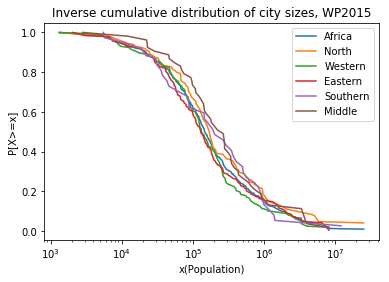

In [149]:
# Generate the inverse cumulative distribution plot

fig = plt.figure()
ax = plt.subplot()
ax.plot(X0, y0, label = 'Africa')
ax.plot(X1, y1, label ='North')
ax.plot(X2, y2, label = 'Western')
ax.plot(X3, y3, label = 'Eastern')
ax.plot(X4, y4, label = 'Southern')
ax.plot(X5, y5, label = "Middle")
plt.xscale('log')
plt.title('Legend inside')
plt.title('Inverse cumulative distribution of city sizes, WP{year}'.format(year=year))
plt.xlabel('x(Population)')
plt.ylabel('P[X>=x]')
ax.legend()
plt.savefig(working_directory+'AGU_ICD_WP2015.png', dpi = 1200)
#plt.show()
# plt.legend()

In [ ]:
GRUMP2000_df = pd.read_csv(working_directory+'20181207_GRUMP2000_zone_pop.csv')
GRUMP2015_df = pd.read_csv(working_directory+'20181207_GRUMP2015_zone_pop.csv')

In [ ]:
# drop doubles and zeros
print(GRUMP2000_df.shape)
GRUMP2000_df = GRUMP2000_df[GRUMP2000_df['GRUMP2000_PopTot'] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)
print(GRUMP2000_df.shape)
GRUMP2000_df = GRUMP2000_df.drop_duplicates('osm_id', keep=False)
print(df.shape)

# drop doubles and zeros
print(GRUMP2015_df.shape)
GRUMP2015_df = GRUMP2015_df[GRUMP2015_df['GRUMP2015_PopTot'] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)
print(GRUMP2015_df.shape)
GRUMP2015_df = GRUMP2015_df.drop_duplicates('osm_id', keep=False)
print(GRUMP2015_df.shape)

In [77]:
data_2000 = WP2000_df['WP2000_PopTot'].sort_values()
data_2015 = WP2015_df['WP2015_PopTot'].sort_values()

In [76]:
from math import log10, floor, ceil

max_data1 = ceil(log10(max(max(data_2015),max(data_2000))))  # Find the minimum log scale in the data
min_data1 = floor(log10(min(min(data_2015),min(data_2000)))) # Find the maximum log scale in the data

values1 = [pow(10,x) for x in np.arange(min_data,max_data,0.25)] # Generate a list of values for the inverse cdf.

X1, y1a = p_X_gt_x(data_2000, X=values)
X1, y1b = p_X_gt_x(data_2015, X=values)

# X, y1 = p_X_lt_x(data_2000, X=values)
# X, y2 = p_X_lt_x(data_2015, X=values)

# plt.plot(X,y2-y1)
# plt.xscale('log')
# plt.title('Change in Cumulative Distribution Function')
# plt.xlabel('City Size')
# plt.ylabel('2015-2000')

In [78]:
max_data2 = ceil(log10(max(max(data_2015),max(data_2000))))  # Find the minimum log scale in the data
min_data2 = floor(log10(min(min(data_2015),min(data_2000)))) # Find the maximum log scale in the data

values2 = [pow(10,x) for x in np.arange(min_data,max_data,0.25)] # Generate a list of values for the inverse cdf.

X2, y2a = p_X_gt_x(data_2000, X=values)
X2, y2b = p_X_gt_x(data_2015, X=values)

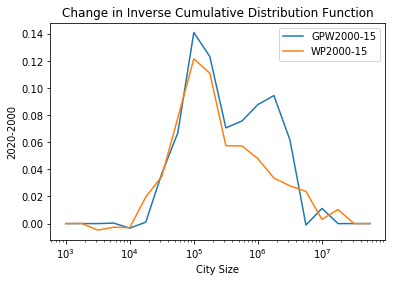

In [124]:
fig = plt.figure()
ax = plt.subplot()
ax.plot(X1,y1b-y1a, label = 'GPW2000-15')
ax.plot(X2,y2b-y2a, label = 'WP2000-15')
ax.legend()
plt.xscale('log')
plt.title('Change in Inverse Cumulative Distribution Function')
plt.xlabel('City Size')
plt.ylabel('2020-2000')
#plt.savefig(working_directory+'AGU_ICD_deltaICD_all.png', dpi = 1200)

# Zipf's Law

In [88]:
maxpopWP2000 = WP2000_df['WP2000_PopTot'].max()
rank_WP2000 = WP2000_df['WP2000_PopTot'].rank(ascending = False)
pop_estWP2000 = 1/pow(rank_WP2000.astype(float),1.07)*maxpopWP2000


maxpopWP2015 = WP2015_df['WP2015_PopTot'].max()
rank_WP2015 = WP2015_df['WP2015_PopTot'].rank(ascending = False)
pop_estWP2015 = 1/pow(rank_WP2015.astype(float),1.07)*maxpopWP2015

maxpopGRUMP2015 = GRUMP2015_df['GRUMP2015_PopTot'].max()
rank_GRUMP2015 = GRUMP2015_df['GRUMP2015_PopTot'].rank(ascending = False)
pop_estGRUMP2015 = 1/pow(rank_GRUMP2015.astype(float),1.07)*maxpopGRUMP2015

maxpopGRUMP2000 = GRUMP2000_df['GRUMP2000_PopTot'].max()
rank_GRUMP2000 = GRUMP2000_df['GRUMP2000_PopTot'].rank(ascending = False)
pop_estGRUMP2000 = 1/pow(rank_GRUMP2000.astype(float),1.07)*maxpopGRUMP2000

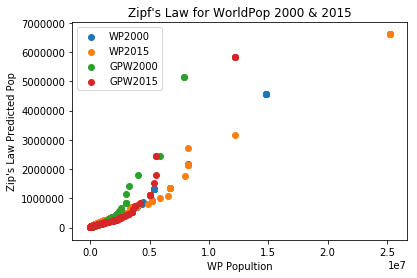

In [150]:
plt.scatter(WP2000_df['WP2000_PopTot'], pop_estWP2000, label = 'WP2000')
plt.scatter(WP2015_df['WP2015_PopTot'], pop_estWP2015, label = 'WP2015')
plt.scatter(GRUMP2000_df['GRUMP2000_PopTot'], pop_estGRUMP2000, label = 'GPW2000')
plt.scatter(GRUMP2015_df['GRUMP2015_PopTot'], pop_estGRUMP2015, label = 'GPW2015')
# plt.plot([100000, WP2015_df['WP2015_PopTot'].max()], 
#          [100000, WP2015_df['WP2015_PopTot'].max()], 'k-')

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.scatter(WP2000_df['WP2000_PopTot'], pop_estWP2000, label = 'WP2000')
#ax.scatter(WP2015_df['WP2015_PopTot'], pop_estWP2015, label = 'WP2015')
plt.legend()
plt.xscale('linear')
plt.yscale('linear')
plt.title('Zipf\'s Law for WorldPop 2000 & 2015')
plt.xlabel('WP Popultion')
plt.ylabel('Zip\'s Law Predicted Pop')
plt.savefig(working_directory+'AGU_Zipf.png', dpi = 1200)


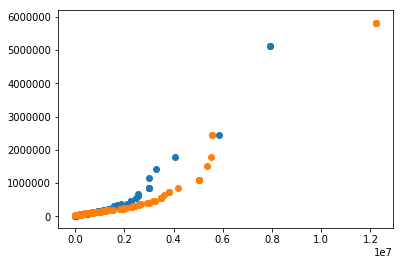

In [118]:
plt.scatter(GRUMP2000_df['GRUMP2000_PopTot'], pop_estGRUMP2000)
plt.scatter(GRUMP2015_df['GRUMP2015_PopTot'], pop_estGRUMP2015)
plt.xscale('linear')
plt.yscale('linear')